In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

Number of frames: 1610


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_42197/3132091180.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


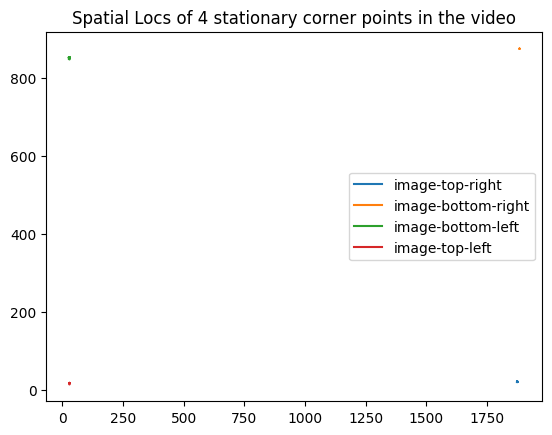

'\nBasically the image axes in pixels are:\norigin is at the top left corner\nincreases towards the right and bottom\n'

In [2]:
# Corner Data
filename = "/Users/pranathipoojary/Downloads/12_38_1_digitisation/12_38_1_corner_data_xypts.csv"
df = pd.read_csv(filename)
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))


plt.plot(df['pt1_cam1_X'], df['pt1_cam1_Y'])
plt.plot(df['pt2_cam1_X'], df['pt2_cam1_Y'])
plt.plot(df['pt3_cam1_X'], df['pt3_cam1_Y'])
plt.plot(df['pt4_cam1_X'], df['pt4_cam1_Y'])
plt.legend(['image-top-right', 'image-bottom-right', 'image-bottom-left', 'image-top-left'])
plt.title('Spatial Locs of 4 stationary corner points in the video')
plt.show()


'''
Basically the image axes in pixels are:
origin is at the top left corner
increases towards the right and bottom
'''

/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_42197/2363281159.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


There are 1155 nans in pt1_cam1_X
There are 1155 nans in pt1_cam1_Y
There are 1546 nans in pt2_cam1_X
There are 1546 nans in pt2_cam1_Y
There are 1545 nans in pt3_cam1_X
There are 1545 nans in pt3_cam1_Y
Number of frames: 1610


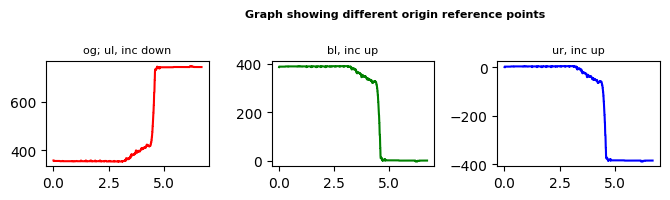

WE WILL BE USING THE BOTTOM LEFT REF POINT (green fig)
This means that the origin is the final walker point


In [3]:
# Rod data | pt1 is rod point, pt2 is mat right end, pt3 is mat left end
fps = 240
filename = "12_38_1_digitisation/12_38_1_rod_mat2_data_xypts.csv"
df = pd.read_csv(filename)
for col in df.columns:
    print(f'There are {df[col].isna().sum()} nans in {col}')
df.fillna(method='ffill', inplace=True)
print("Number of frames:", len(df))

frames = range(1, len(df)+1)
time = [frame/fps for frame in list(frames)]
df['bl_ref_y'] = df['pt1_cam1_Y'].iloc[-1] - df['pt1_cam1_Y']
df['ur_ref_y'] = df['pt1_cam1_Y'].iloc[0] - df['pt1_cam1_Y']

fig, axs = plt.subplots(1, 3, figsize=(8, 2))
fig.suptitle("Graph showing different origin reference points", fontsize=8, fontweight='bold')

axs[0].plot(time, df['pt1_cam1_Y'], 'r', label='og; ul, inc down')
axs[1].plot(time, df['bl_ref_y'], 'g', label='bl, inc up')
axs[2].plot(time, df['ur_ref_y'], 'b', label='ur, inc up')
axs[0].set_title('og; ul, inc down', fontsize=8)
axs[1].set_title('bl, inc up', fontsize=8)
axs[2].set_title('ur, inc up', fontsize=8)


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
print("WE WILL BE USING THE BOTTOM LEFT REF POINT (green fig)\nThis means that the origin is the final walker point")

In [4]:
# Pixel to mm conversion using mat
len_of_mat_mm = 39
right_end_X = df['pt2_cam1_X'].mean().item()
right_end_Y = df['pt2_cam1_Y'].mean().item()
left_end_X = df['pt3_cam1_X'].mean().item()
left_end_Y = df['pt3_cam1_Y'].mean().item()

len_of_mat_pix = math.sqrt(((right_end_X-left_end_X)**2) + ((right_end_Y-left_end_Y)**2))
one_pix_in_mm = len_of_mat_mm/len_of_mat_pix

print("Right end of the mat coords:", (round(right_end_X, 2), round(right_end_Y, 2)))
print("Left end of the mat coords:", (round(left_end_X, 2), round(left_end_Y, 2)))
print("Length of mat in pixels:", round(len_of_mat_pix, 2), "pixels")
print("One pixel in mm:", round(one_pix_in_mm, 2), "mm")

df_mm = df.copy(deep=True)
for col in df_mm.columns:
    df_mm[col] = df_mm[col]*one_pix_in_mm

# Verifying conversion from pix to mm with mat length
# right_end_X = df_mm['pt2_cam1_X'].mean().item()
# right_end_Y = df_mm['pt2_cam1_Y'].mean().item()
# left_end_X = df_mm['pt3_cam1_X'].mean().item()
# left_end_Y = df_mm['pt3_cam1_Y'].mean().item()
# len_of_mat_mm = math.sqrt(((right_end_X-left_end_X)**2) + ((right_end_Y-left_end_Y)**2))
# print("Right end of the mat coords:", (round(right_end_X, 2), round(right_end_Y, 2)))
# print("Left end of the mat coords:", (round(left_end_X, 2), round(left_end_Y, 2)))
# print(len_of_mat_mm)

Right end of the mat coords: (1506.66, 722.01)
Left end of the mat coords: (1376.36, 730.33)
Length of mat in pixels: 130.56 pixels
One pixel in mm: 0.3 mm


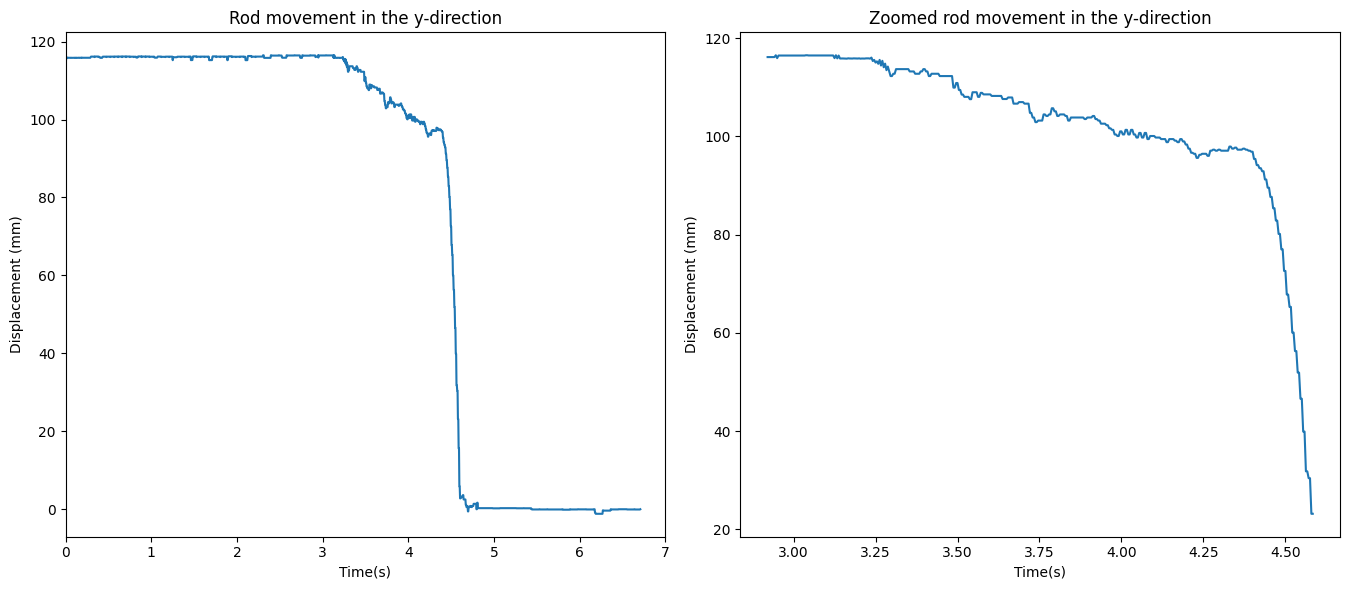

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(time, df_mm['bl_ref_y'])
axs[1].plot(time[700:1100], df_mm['bl_ref_y'][700:1100])

axs[0].set_xlim([0, 7])
axs[0].set_title('Rod movement in the y-direction')
axs[1].set_title('Zoomed rod movement in the y-direction')
for ax in axs:
    ax.set_xlabel('Time(s)')
    ax.set_ylabel('Displacement (mm)')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [6]:
# Energy Calcs
# PE Calc
rod_y_m = df_mm['bl_ref_y']*(10**-3)
rod_x_m = df_mm['pt1_cam1_X']*(10**-3)
ramp_angle = 4
time_frames = range(1, len(df_mm)+1)
g = 9.80665

mass = 0.029
potential_E = mass * g * (rod_y_m + math.tan(ramp_angle*math.pi/180) * rod_x_m)

# KE Calc
v_x = np.gradient(rod_x_m, time)
v_y = np.gradient(rod_y_m, time)
window_size = 10
vx_smoothed = np.convolve(v_x, np.ones(window_size)/window_size, mode='same')
vy_smoothed = np.convolve(v_y, np.ones(window_size)/window_size, mode='same')

kinetic_E = 0.5 * mass * (vx_smoothed**2 + vy_smoothed**2)

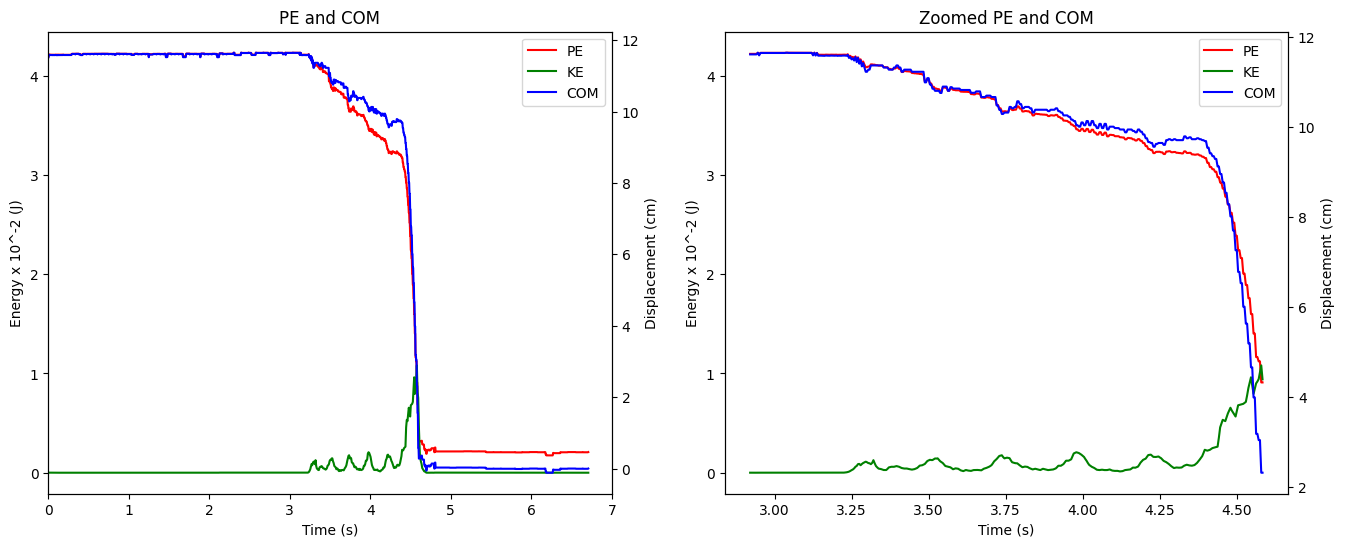

In [7]:
# Energy Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

line0, = axs[0].plot(time, potential_E * 10**2, 'r', label='PE')
line1, = axs[0].plot(time, kinetic_E * 10**2, 'g', label='KE')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Energy x 10^-2 (J)')
axs[0].set_title("PE and COM")
axs[0].set_xlim([0, 7])

ax2 = axs[0].twinx()
line2, = ax2.plot(time, rod_y_m * 10**2, 'b', label='COM')
ax2.set_ylabel('Displacement (cm)')

lines = [line0, line1, line2]
labels = [line.get_label() for line in lines]
axs[0].legend(lines, labels, loc="upper right")

# #------------------
line0, = axs[1].plot(time[700:1100], potential_E[700:1100] * 10**2, 'r', label='PE')
line1, = axs[1].plot(time[700:1100], kinetic_E[700:1100] * 10**2, 'g', label='KE')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Energy x 10^-2 (J)')
axs[1].set_title("PE and COM")

ax2 = axs[1].twinx()
line2, = ax2.plot(time[700:1100], rod_y_m[700:1100] * 10**2, 'b', label='COM')
ax2.set_ylabel('Displacement (cm)')

lines = [line0, line1, line2]
labels = [line.get_label() for line in lines]
axs[1].legend(lines, labels, loc="upper right")
axs[1].set_title("Zoomed PE and COM")

plt.show()

/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_42197/4228603130.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Text(0, 0.5, 'Angle (degrees)')

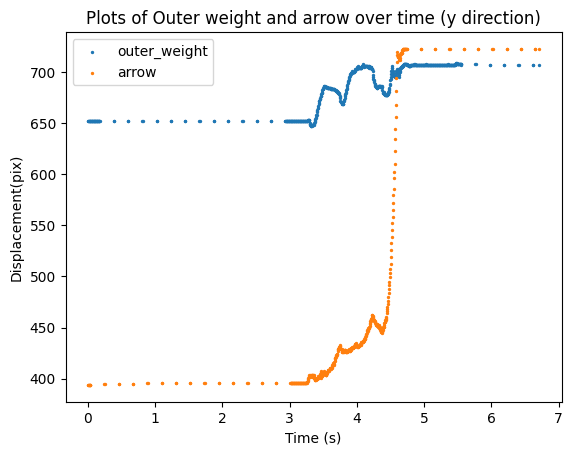

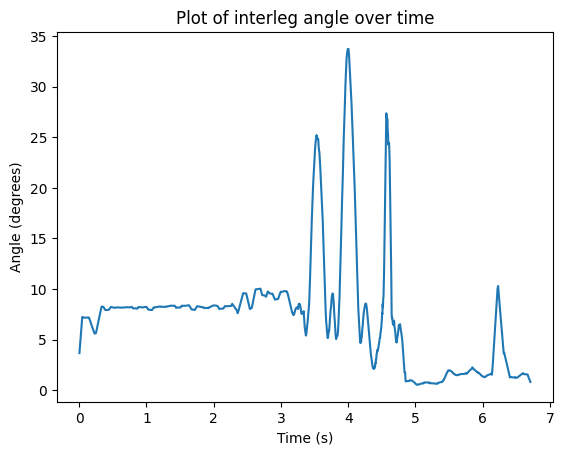

In [15]:
# All in bl refernce axis same as above
filename = "12_38_1_digitisation/12_38_1_rod_outer_weight_arrow_data_xypts.csv"
df = pd.read_csv(filename)
plt.figure()
plt.scatter(time, df['pt2_cam1_Y'], s=2,)
plt.scatter(time, df['pt3_cam1_Y'], s=2,)
plt.legend(['outer_weight', 'arrow'])
plt.title('Plots of Outer weight and arrow over time (y direction)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement(pix)')

df.fillna(method='ffill', inplace=True)
df_mm = df.copy(deep=True)
for col in df_mm.columns:
    df_mm[col] = df_mm[col]*one_pix_in_mm

ow_y = np.array(df_mm['pt2_cam1_Y'].iloc[-1] - df_mm['pt2_cam1_Y']) # outer weight
arrow_y = np.array(df_mm['pt3_cam1_Y'].iloc[-1] - df_mm['pt3_cam1_Y'])
rod_y = np.array(rod_y_m * 10**3)
# print(round(np.sum(rod_y - (df_mm['pt1_cam1_Y'].iloc[-1] - df_mm['pt1_cam1_Y'])), 2))

ow_x = np.array(df_mm['pt2_cam1_X']) # outer weight
arrow_x = np.array(df_mm['pt3_cam1_X'])
rod_x = np.array(rod_x_m * 10**3)

arrow_to_rod_len = np.sqrt((arrow_x-rod_x)**2 + (arrow_y-rod_y)**2)
rod_to_ow_len = np.sqrt((ow_x-rod_x)**2 + (ow_y-rod_y)**2)
ow_to_arrow_len = np.sqrt((ow_x-arrow_x)**2 + (ow_y-arrow_y)**2)

inter_leg_rad = np.arccos((arrow_to_rod_len**2 + rod_to_ow_len**2 - ow_to_arrow_len**2)/(2*arrow_to_rod_len*rod_to_ow_len))
inter_leg_deg = inter_leg_rad*180/math.pi

window_size = 20
inter_leg_deg_smoothed = np.convolve(inter_leg_deg, np.ones(window_size)/window_size, mode='same')
plt.figure()
# plt.plot(time, inter_leg_deg)
plt.plot(time, inter_leg_deg_smoothed)
plt.title('Plot of interleg angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')



